In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df = pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
final_df=pd.concat([train_df, test_df], ignore_index=True)
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


## Feature Engineering 

In [6]:
final_df['Date'] = final_df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
final_df['Month'] = final_df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
final_df['Year'] = final_df['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [7]:
final_df['Date'] = final_df['Date'].astype('int')
final_df['Month'] = final_df['Month'].astype('int')
final_df['Year'] = final_df['Year'].astype('int')

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


In [9]:
final_df.drop('Date_of_Journey', axis=1 , inplace=True)

In [10]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [11]:
# final_df['Arrival_Time'].str.split(' ').str[0]
final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
13349    20:25
13350    16:55
13351    04:25
13352    19:15
13353    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [12]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [13]:
final_df['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
13349    20:25 07 Jun
13350           16:55
13351    04:25 07 Mar
13352           19:15
13353           19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [14]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(' ').str[0] 

In [15]:
final_df['Arrival_Hour'] = final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_Minute'] = final_df['Arrival_Time'].str.split(':').str[1]

In [16]:
final_df['Arrival_Hour'] = final_df['Arrival_Hour'].astype('int') 
final_df['Arrival_Minute'] = final_df['Arrival_Minute'].astype('int') 

In [17]:
final_df.drop('Arrival_Time', axis=1 , inplace=True)

In [18]:
final_df['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
13349    20:30
13350    14:20
13351    21:50
13352    04:00
13353    04:55
Name: Dep_Time, Length: 13354, dtype: object

In [19]:
final_df['Dep_Hour'] = final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_Minutes'] = final_df['Dep_Time'].str.split(':').str[1]

In [20]:
final_df.drop('Dep_Time' , axis=1, inplace=True)

In [ ]:
final_df.drop('Minutes', axis=1, inplace=True)

In [ ]:
final_df.drop('Hour', axis=1, inplace=True)

In [23]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_Hour     13354 non-null  int64  
 12  Arrival_Minute   13354 non-null  int64  
 13  Dep_Hour         13354 non-null  object 
 14  Dep_Minutes      13354 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 1.5+ MB


In [25]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [26]:
final_df['Total_Stops'] = final_df['Total_Stops'].str.split(' ').str[0]

In [27]:
final_df['Total_Stops'] = final_df['Total_Stops'].astype(str).str.strip().replace({'non-stop':0 })

In [28]:
final_df['Total_Stops'] = final_df['Total_Stops'].astype(str).str.strip().replace({'0':0, '1': 1, '2':2 , '3':3, '4':4})

In [30]:
final_df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [31]:
route_split = final_df['Route'].str.split('→', expand=True)

In [32]:
route_split = route_split.apply(lambda x:x.str.strip())
route_split

,0,1,2,3,4,5
0,BLR,DEL,None,None,None,None
1,CCU,IXR,BBI,BLR,None,None
2,DEL,LKO,BOM,COK,None,None
3,CCU,NAG,BLR,None,None,None
4,BLR,NAG,DEL,None,None,None
...,...,...,...,...,...,...
13349,CCU,DEL,BLR,None,None,None
13350,CCU,BLR,None,None,None,None
13351,DEL,BOM,COK,None,None,None
13352,DEL,BOM,COK,None,None,None


In [33]:
route_split.columns = [f'Stop_{i+1}' for i in range(route_split.shape[1])]

In [34]:
for i in range(route_split.shape[1]):
    final_df.drop(f'Stop_{i+1}', inplace=True, axis=1)

KeyError: "['Stop_1'] not found in axis"

In [35]:
final_df = pd.concat([final_df, route_split], axis=1)
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minutes,Stop_1,Stop_2,Stop_3,Stop_4,Stop_5,Stop_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,1,10,22,20,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,...,13,15,05,50,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,...,4,25,09,25,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,...,23,30,18,05,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,...,21,35,16,50,BLR,NAG,DEL,None,None,None


In [36]:
all_stops = route_split.melt(value_name='Airport', var_name='Stop').dropna()
all_stops

,Stop,Airport
0,Stop_1,BLR
1,Stop_1,CCU
2,Stop_1,DEL
3,Stop_1,CCU
4,Stop_1,BLR
...,...,...
66521,Stop_5,VGA
66541,Stop_5,BLR
66586,Stop_5,COK
75952,Stop_6,DEL


In [37]:
airport_count = all_stops['Airport'].value_counts().reset_index()
airport_count.columns = ['Airport', 'Count']
airport_count

,Airport,Count
0,DEL,9414
1,BOM,7151
2,BLR,6627
3,COK,5795
4,CCU,4135
5,HYD,1617
6,MAA,885
7,AMD,371
8,JAI,342
9,BBI,158


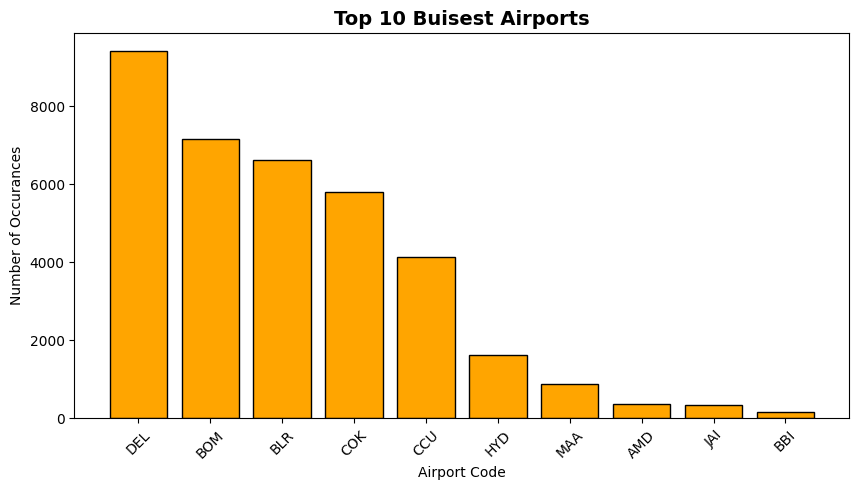

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(airport_count['Airport'][:10] , airport_count['Count'][:10], 
       color='orange', edgecolor='black')
plt.title('Top 10 Buisest Airports', fontsize=14, fontweight='bold')
plt.xlabel('Airport Code')
plt.ylabel('Number of Occurances')
plt.xticks(rotation=45)
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [50]:
final_df.drop('Duration', axis=1, inplace=True)

In [46]:
final_df['Airline'] = labelencoder.fit_transform(final_df['Airline'])
final_df['Source'] = labelencoder.fit_transform(final_df['Airline'])
final_df['Destination'] = labelencoder.fit_transform(final_df['Airline'])
final_df['Additional_Info'] = labelencoder.fit_transform(final_df['Airline'])

In [56]:
final_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minutes,Stop_1,Stop_2,Stop_3,Stop_4,Stop_5,Stop_6
0,3,3,3,0,3,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None,None
1,1,1,1,2,1,7662.0,1,5,2019,13,15,05,50,CCU,IXR,BBI,BLR,None,None
